# Company:Bharat Intern

# Name: Payal Rakhama Paymode


# Task 1:Stock Prediction

# Domain: Data Science

# importing Libraries

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

import warnings

warnings.filterwarnings('ignore')

In [2]:

pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("MSFT (1).csv")

# show the dataset

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400
...,...,...,...,...,...,...,...
9078,2022-03-18,295.369995,301.000000,292.730011,300.429993,300.429993,43317000
9079,2022-03-21,298.890015,300.140015,294.899994,299.160004,299.160004,28351200
9080,2022-03-22,299.799988,305.000000,298.769989,304.059998,304.059998,27599700
9081,2022-03-23,300.510010,303.230011,297.720001,299.489990,299.489990,25715400


# visualize the closing prices

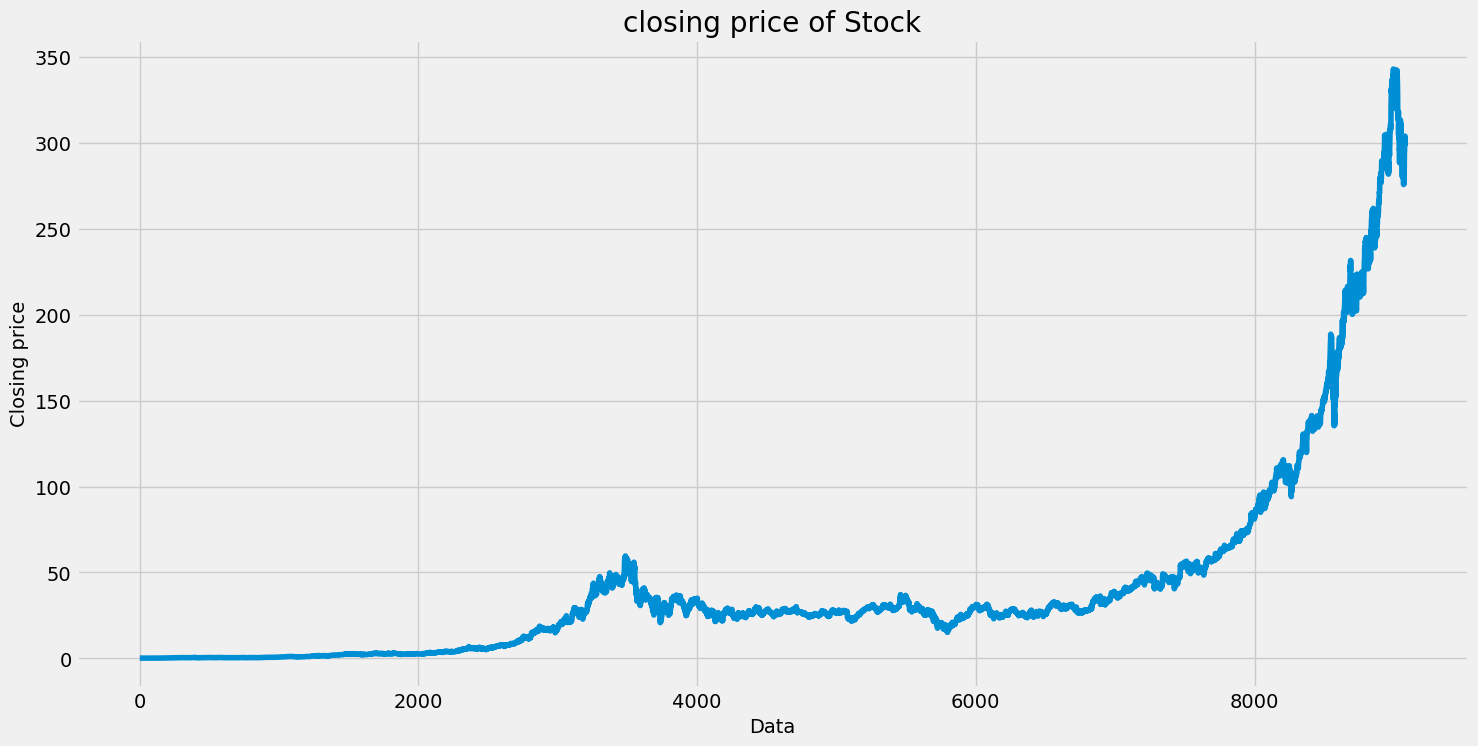

In [5]:
plt.figure(figsize=(16,8))
plt.title('closing price of Stock')
plt.plot(df["Close"])
plt.xlabel('Data')
plt.ylabel('Closing price')
plt.show()

# create new database with only required coloumns

In [6]:
data=df.filter(['Close'])


# convert the dataframe to numpy array

In [7]:
dataset=data.values



# get the number of rows to train 80 percent

In [8]:
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

7267

# scale the data

In [9]:
scaler=StandardScaler() 
scaled_data=scaler.fit_transform(dataset)
print("MEAN of processed data: ",scaled_data.mean())
print("Standard deviation of processed data: ",scaled_data.std())

MEAN of processed data:  1.0013153162753806e-16
Standard deviation of processed data:  1.0


# create the training data
#create scaled training dataset

In [10]:

train_data = scaled_data[0:training_data_len, :]
#split the data to x_train and y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i])
  y_train.append(train_data[i])

# convert x_train and y_train into numpy arrays

In [11]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train.shape

(7207, 60, 1)

# reshape the data

In [12]:

print("x_train shape before reshaping",x_train.shape)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) #np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print("x_train shape after reshaping",x_train.shape)

x_train shape before reshaping (7207, 60, 1)
x_train shape after reshaping (7207, 60, 1)


# build LSTM model

In [13]:

model= Sequential()
model.add(LSTM(200,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(200,return_sequences=False))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1))

# compile the model

In [14]:

model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 200)           161600    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 507,601
Trainable params: 507,601
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(x_train,y_train,epochs=20)

Epoch 1/20
226/226 [==============================] - 141s 380ms/step - loss: 0.0025
Epoch 2/20
226/226 [==============================] - 81s 358ms/step - loss: 2.3384e-04
Epoch 3/20
226/226 [==============================] - 81s 358ms/step - loss: 2.1841e-04
Epoch 4/20
226/226 [==============================] - 42s 184ms/step - loss: 1.9140e-04
Epoch 5/20
226/226 [==============================] - 43s 190ms/step - loss: 1.8343e-04
Epoch 6/20
226/226 [==============================] - 41s 181ms/step - loss: 1.6999e-04
Epoch 7/20
226/226 [==============================] - 45s 200ms/step - loss: 1.7060e-04
Epoch 8/20
226/226 [==============================] - 44s 194ms/step - loss: 1.5890e-04
Epoch 9/20
226/226 [==============================] - 42s 188ms/step - loss: 1.5560e-04
Epoch 10/20
226/226 [==============================] - 44s 194ms/step - loss: 1.3761e-04
Epoch 11/20
226/226 [==============================] - 43s 192ms/step - loss: 1.2467e-04
Epoch 12/20
226/226 [============

# train the model

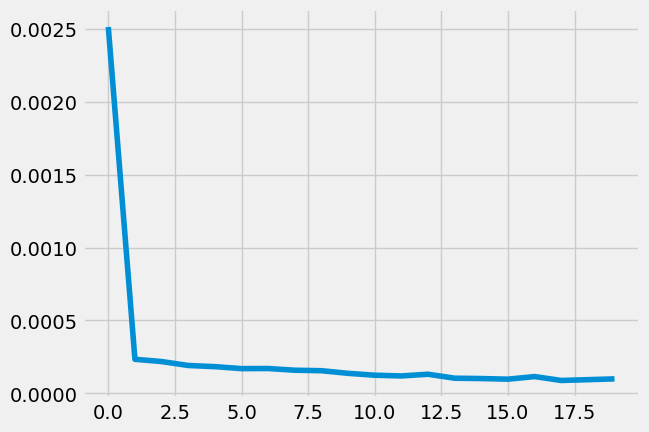

In [16]:
plt.plot(history.history['loss'])

# create the testing dataset
#createt new array

In [17]:

test_data=scaled_data[training_data_len-60:, :]
#create the dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len: , :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [18]:
#convert the data to numpy 
x_test=np.array(x_test)

In [19]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [20]:
#get the model predicted value
predictions =model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
print(predictions)

57/57 [==============================] - 7s 49ms/step
[[ 46.26827 ]
 [ 47.568363]
 [ 47.277565]
 ...
 [289.9397  ]
 [292.31915 ]
 [290.49588 ]]


In [21]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

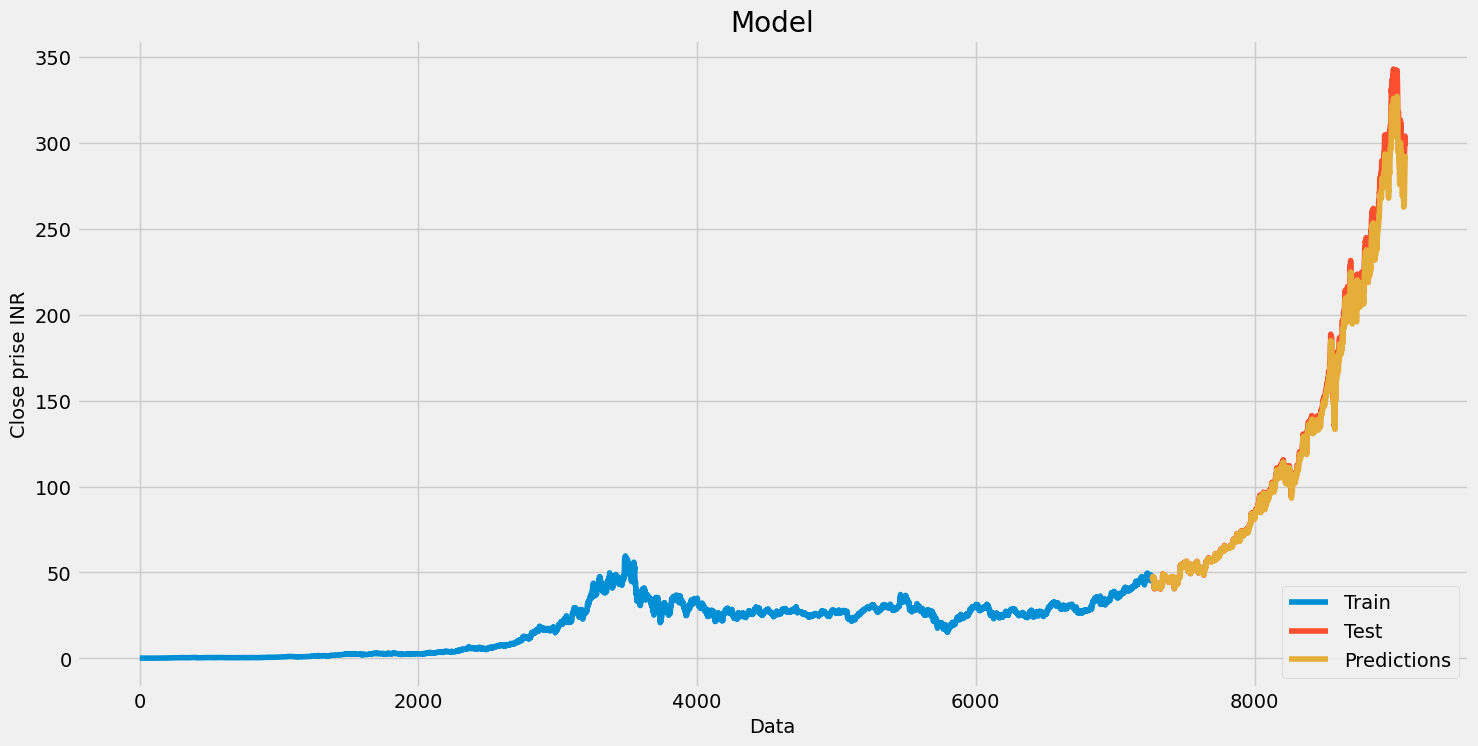

In [22]:
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data')
plt.ylabel('Close prise INR')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Test','Predictions'],loc='lower right')
plt.show()

In [23]:
#show the valid and predicted value
valid

,Close,Predictions
7267,47.590000,46.268269
7268,47.189999,47.568363
7269,46.599998,47.277565
7270,46.360001,46.641674
7271,45.959999,46.359238
...,...,...
9078,300.429993,284.802063
9079,299.160004,289.166992
9080,304.059998,289.939697
9081,299.489990,292.319153
